In [1]:
# API KEY Loading
from dotenv import load_dotenv

load_dotenv()

True

In [2]:
from langchain_teddynote import logging

logging.langsmith("CH21-LangGraph")

LangSmith 추적을 시작합니다.
[프로젝트명]
CH21-LangGraph


# ToolNode 

- LangGraph에서 pre-built
- 메시지 목록이 포함된 그래프 상태를 입력으로 받아 도구 호출 결과로 상태를 업데이트 

[참고] 
- PythonAstREPLTool
- LangChain에서 LLM이 파이썬 코드를 안전하게 실행할 수 있도록 만들어진 도구 
- AST(Abstract Syntax Tree) 기반으로 코드를 분석하고 실행하여, 더 안전하고 유연한 실행 환경 제공 

In [5]:
from typing import List, Dict
from langchain_core.tools import tool
from langchain_experimental.tools.python.tool import PythonAstREPLTool
from langchain_teddynote.tools import GoogleNews
from langgraph.prebuilt import ToolNode, tools_condition

### 도구 정의 

In [4]:
@tool
def search_news(query: str) -> List[Dict[str, str]]:
    """Search Google News by input keyword"""
    news_tool = GoogleNews()
    return news_tool.search_by_keyword(query, k=5)


@tool
def python_code_interpreter(code: str):
    """Call to execute python code."""
    return PythonAstREPLTool().invoke(code)

In [ ]:
# 도구 리스트 생성
tools = [search_news, python_code_interpreter]

# ToolNode 정의 
tool_node = ToolNode(tools)

### 수동 호출

In [7]:
from langchain_core.messages import AIMessage

# 단일 도구 호출을 포함하는 AI 메시지 객체 생성
# AIMessage 객체이어야 함
message_with_single_tool_call = AIMessage(
    content="",
    tool_calls=[
        {
            "name": "search_news",    # 도구 이름
            "args": {"query": "AI"},  # 도구 인자
            "id": "tool_call_id",     # 도구 호출 ID
            "type": "tool_call",      # 도구 호출 유형
        }
    ],
)

# 도구 노드를 통한 메시지 처리 및 날씨 정보 요청 실행
tool_node.invoke({"messages": [message_with_single_tool_call]})

{'messages': [ToolMessage(content='[{"url": "https://news.google.com/rss/articles/CBMiakFVX3lxTE1HMkcySUJIemo1aVowMnlZQXBFWGp1VzBfOXZTczdzQmpLMlJpT19zY1hVeGRkQ0k3eGRJOUtDRVEwUGx4QUhPQlZfNXF5QTJzbm4zbzE1NDdFWVR5ajFrcTktSFlZZGZiVnc?oc=5", "content": "오픈AI, GPT-4o \'네이티브\' 이미지 생성 기능 출시...\'멀티모달 강자\' 구글과 대결 - AI타임스"}, {"url": "https://news.google.com/rss/articles/CBMiVkFVX3lxTFBVNU9EZzNLQkZBRjZBY2l1d2JCRkZpY0d5ODB4S21fdTBjaVczaWxERUdIMUhqZFJHV2FqOWFGc1JuMGNfRDloZnlQUG92enFmQmtjajJR?oc=5", "content": "\\"트럼프 2기, 또 물류난\\"…삼성SDS, AI로 \'제2의 팬데믹\' 막는다 - ZD넷 코리아"}, {"url": "https://news.google.com/rss/articles/CBMi0wJBVV95cUxPZFlSbDVBbEtKS09WcThBZC02MG4xVzk1MVlPeXpRUzNvLUY4ZHVvTEl5VHcyVGpPbk5JOEVia3ZXaVp6VWllY0I1UzczQXM3VkozMV8xTHBMSHl5SjRJSzFWRl8tT1BPQWZZbC10NThWdmxzOTA3ckJVZDdXYTlGcDBMTDNuU3VsWkxydUZhNEdRUFRKNlloM1QtUXlTbk1YRG1ZWjYwOWhDMEd3c3BGR2F3cWN2RFhrT2JmOEY0SFRZVEpUdlFDTjVrdHFZdmFKdUw5YnhfWFVXazFBejhGSlR5OW8xd2d3NDRjT3lsRUV3U0hhTnBTaHRGNHBMcERIMHcxMmFKdGFmZ0llYnVyODFWZEgxbHNqQ1BIZTVjS3VI

In [8]:
# 다중 도구 호출을 포함하는 AI 메시지 객체 생성 및 초기화
message_with_multiple_tool_calls = AIMessage(
    content="",
    tool_calls=[
        {
            "name": "search_news",
            "args": {"query": "AI"},
            "id": "tool_call_id",
            "type": "tool_call",
        },
        {
            "name": "python_code_interpreter",
            "args": {"code": "print(1+2+3+4)"},
            "id": "tool_call_id",
            "type": "tool_call",
        },
    ],
)

# 생성된 메시지를 도구 노드에 전달하여 다중 도구 호출 실행
tool_node.invoke({"messages": [message_with_multiple_tool_calls]})

{'messages': [ToolMessage(content='[{"url": "https://news.google.com/rss/articles/CBMiakFVX3lxTE1HMkcySUJIemo1aVowMnlZQXBFWGp1VzBfOXZTczdzQmpLMlJpT19zY1hVeGRkQ0k3eGRJOUtDRVEwUGx4QUhPQlZfNXF5QTJzbm4zbzE1NDdFWVR5ajFrcTktSFlZZGZiVnc?oc=5", "content": "오픈AI, GPT-4o \'네이티브\' 이미지 생성 기능 출시...\'멀티모달 강자\' 구글과 대결 - AI타임스"}, {"url": "https://news.google.com/rss/articles/CBMiVkFVX3lxTFBVNU9EZzNLQkZBRjZBY2l1d2JCRkZpY0d5ODB4S21fdTBjaVczaWxERUdIMUhqZFJHV2FqOWFGc1JuMGNfRDloZnlQUG92enFmQmtjajJR?oc=5", "content": "\\"트럼프 2기, 또 물류난\\"…삼성SDS, AI로 \'제2의 팬데믹\' 막는다 - ZD넷 코리아"}, {"url": "https://news.google.com/rss/articles/CBMi0wJBVV95cUxPZFlSbDVBbEtKS09WcThBZC02MG4xVzk1MVlPeXpRUzNvLUY4ZHVvTEl5VHcyVGpPbk5JOEVia3ZXaVp6VWllY0I1UzczQXM3VkozMV8xTHBMSHl5SjRJSzFWRl8tT1BPQWZZbC10NThWdmxzOTA3ckJVZDdXYTlGcDBMTDNuU3VsWkxydUZhNEdRUFRKNlloM1QtUXlTbk1YRG1ZWjYwOWhDMEd3c3BGR2F3cWN2RFhrT2JmOEY0SFRZVEpUdlFDTjVrdHFZdmFKdUw5YnhfWFVXazFBejhGSlR5OW8xd2d3NDRjT3lsRUV3U0hhTnBTaHRGNHBMcERIMHcxMmFKdGFmZ0llYnVyODFWZEgxbHNqQ1BIZTVjS3VI

## LLM binding

In [9]:
from langchain_openai import ChatOpenAI

In [10]:
model_with_tools = ChatOpenAI(
    model="gpt-4o-mini", 
    temperature=0
).bind_tools(tools)

In [11]:
# 도구 호출 확인
model_with_tools.invoke("처음 5개의 소수를 출력하는 python code 를 작성해줘").tool_calls

[{'name': 'python_code_interpreter',
  'args': {'code': 'def first_n_primes(n):\n    primes = []\n    num = 2  # Starting from the first prime number\n    while len(primes) < n:\n        is_prime = True\n        for i in range(2, int(num**0.5) + 1):\n            if num % i == 0:\n                is_prime = False\n                break\n        if is_prime:\n            primes.append(num)\n        num += 1\n    return primes\n\n# Get the first 5 prime numbers\nfirst_n_primes(5)'},
  'id': 'call_JMgG3lXVkbgJxclBuLmzP6lX',
  'type': 'tool_call'}]

In [12]:
# 도구 노드를 통한 메시지 처리 및 LLM 모델의 도구 기반 응답 생성
tool_node.invoke(
    {
        "messages": [
            model_with_tools.invoke(
                "처음 5개의 소수를 출력하는 python code 를 작성해줘"
            )
        ]
    }
)

{'messages': [ToolMessage(content='[2, 3, 5, 7, 11]', name='python_code_interpreter', tool_call_id='call_tlzR4xRR77H03pzkwIOZkPEg')]}

## Agent 적용

In [13]:
from langgraph.graph import StateGraph, MessagesState, START, END

In [14]:
# LLM 모델을 사용하여 메시지 처리 및 응답 생성, 도구 호출이 포함된 응답 반환
def call_model(state: MessagesState):
    messages = state["messages"]
    response = model_with_tools.invoke(messages)
    return {"messages": [response]}


# Graph
workflow = StateGraph(MessagesState)

workflow.add_node("agent", call_model)
workflow.add_node("tools", tool_node)

workflow.add_edge(START, "agent")
workflow.add_conditional_edges("agent", tools_condition)

workflow.add_edge("tools", "agent")
workflow.add_edge("agent", END)

app = workflow.compile()

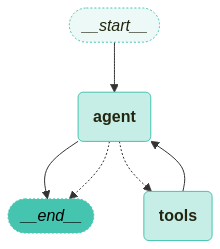

In [15]:
from langchain_teddynote.graphs import visualize_graph

visualize_graph(app)

In [16]:
# 실행 및 결과 확인
for chunk in app.stream(
    {"messages": [("human", "처음 5개의 소수를 출력하는 python code 를 작성해줘")]},
    stream_mode="values",
):
    # 마지막 메시지 출력
    chunk["messages"][-1].pretty_print()

================================ Human Message =================================

처음 5개의 소수를 출력하는 python code 를 작성해줘
================================== Ai Message ==================================
Tool Calls:
  python_code_interpreter (call_2YP8HydwMJlSQjuSwQwQFIk0)
 Call ID: call_2YP8HydwMJlSQjuSwQwQFIk0
  Args:
    code: def first_n_primes(n):
    primes = []
    num = 2  # Starting from the first prime number
    while len(primes) < n:
        is_prime = True
        for i in range(2, int(num**0.5) + 1):
            if num % i == 0:
                is_prime = False
                break
        if is_prime:
            primes.append(num)
        num += 1
    return primes

# Get the first 5 prime numbers
first_n_primes(5)
================================= Tool Message =================================
Name: python_code_interpreter

[2, 3, 5, 7, 11]
================================== Ai Message ==================================

처음 5개의 소수는 다음과 같습니다: [2, 3, 5, 7, 11]


In [17]:
# 검색 질문 수행
for chunk in app.stream(
    {"messages": [("human", "search google news about AI")]},
    stream_mode="values",
):
    chunk["messages"][-1].pretty_print()

================================ Human Message =================================

search google news about AI
================================== Ai Message ==================================
Tool Calls:
  search_news (call_GiiChMgZirpIawsf33FxJy0R)
 Call ID: call_GiiChMgZirpIawsf33FxJy0R
  Args:
    query: AI
================================= Tool Message =================================
Name: search_news

[{"url": "https://news.google.com/rss/articles/CBMiakFVX3lxTE1HMkcySUJIemo1aVowMnlZQXBFWGp1VzBfOXZTczdzQmpLMlJpT19zY1hVeGRkQ0k3eGRJOUtDRVEwUGx4QUhPQlZfNXF5QTJzbm4zbzE1NDdFWVR5ajFrcTktSFlZZGZiVnc?oc=5", "content": "오픈AI, GPT-4o '네이티브' 이미지 생성 기능 출시...'멀티모달 강자' 구글과 대결 - AI타임스"}, {"url": "https://news.google.com/rss/articles/CBMiVkFVX3lxTFBVNU9EZzNLQkZBRjZBY2l1d2JCRkZpY0d5ODB4S21fdTBjaVczaWxERUdIMUhqZFJHV2FqOWFGc1JuMGNfRDloZnlQUG92enFmQmtjajJR?oc=5", "content": "\"트럼프 2기, 또 물류난\"…삼성SDS, AI로 '제2의 팬데믹' 막는다 - ZD넷 코리아"}, {"url": "https://news.google.com/rss/articles/CBMi0wJBVV95cUxPZFlSbDVB

In [18]:
# 도구 호출이 필요 없는 질문 수행
for chunk in app.stream(
    {"messages": [("human", "안녕? 반가워")]},
    stream_mode="values",
):
    chunk["messages"][-1].pretty_print()

================================ Human Message =================================

안녕? 반가워
================================== Ai Message ==================================

안녕하세요! 반갑습니다. 어떻게 도와드릴까요?


-----
** End of Documents **